<h2>Solucion del taller House Prices</h2>

### Primer punto, leer el dataset y revisar los registros
 


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Tamaño del set de entrenamiento:", train.shape)
print("Tamaño del set de prueba:", test.shape)

train.head()

Tamaño del set de entrenamiento: (1460, 81)
Tamaño del set de prueba: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train['source'] = 'train'
test['source'] = 'test'

data = pd.concat([train, test], ignore_index=True)

data.info()

data.isnull().sum().sort_values(ascending=False).head(20)






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
dtype: int64

In [4]:
numeric_cols = train.select_dtypes(include=['Int64','float64']).columns
print('Cantidad de variables numéricas:', len(numeric_cols))
print(numeric_cols.tolist())

categorial_cols = train.select_dtypes(include=['object']).columns
print('Cantidad de variables categóricas:', len(categorial_cols))
print(categorial_cols.tolist())

data[['SalePrice', 'GrLivArea', 'OverallQual']].sort_values(by='SalePrice', ascending=False).head(10)

Cantidad de variables numéricas: 38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Cantidad de variables categóricas: 44
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Kitc

,SalePrice,GrLivArea,OverallQual
691,755000.0,4316,10
1182,745000.0,4476,10
1169,625000.0,3627,10
898,611657.0,2364,9
803,582933.0,2822,9
1046,556581.0,2868,9
440,555000.0,2402,10
769,538000.0,3279,8
178,501837.0,2234,9
798,485000.0,3140,9


In [9]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## Segundo Punto: exploración de los graficos mediante gráficos


C:\Users\Asus\AppData\Local\Temp\ipykernel_23072\2686656088.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_total.values, y=corr_total.index, palette='coolwarm', ax=axes[1,0])
C:\Users\Asus\AppData\Local\Temp\ipykernel_23072\2686656088.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.head(20).values, y=corr.head(20).index, palette='Reds_r')
C:\Users\Asus\AppData\Local\Temp\ipykernel_23072\2686656088.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.head(20).values, y=corr.head(20).index, palette='Reds_r')


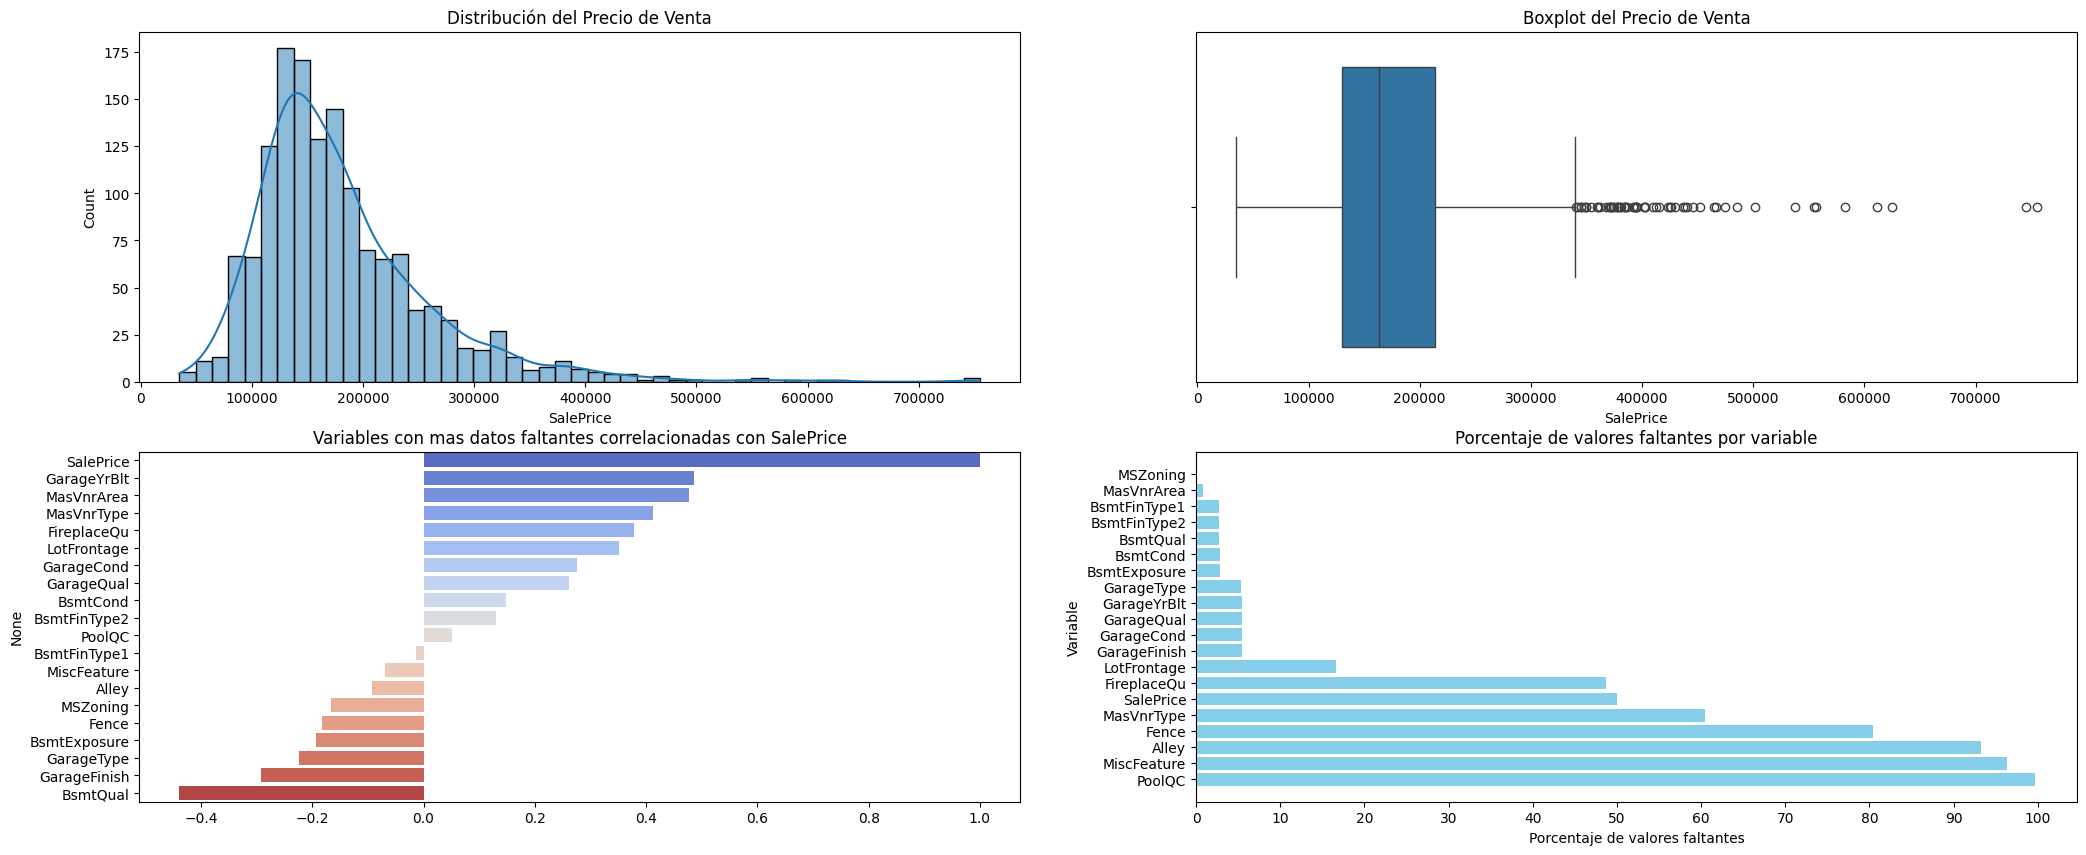

<Figure size 1000x600 with 0 Axes>

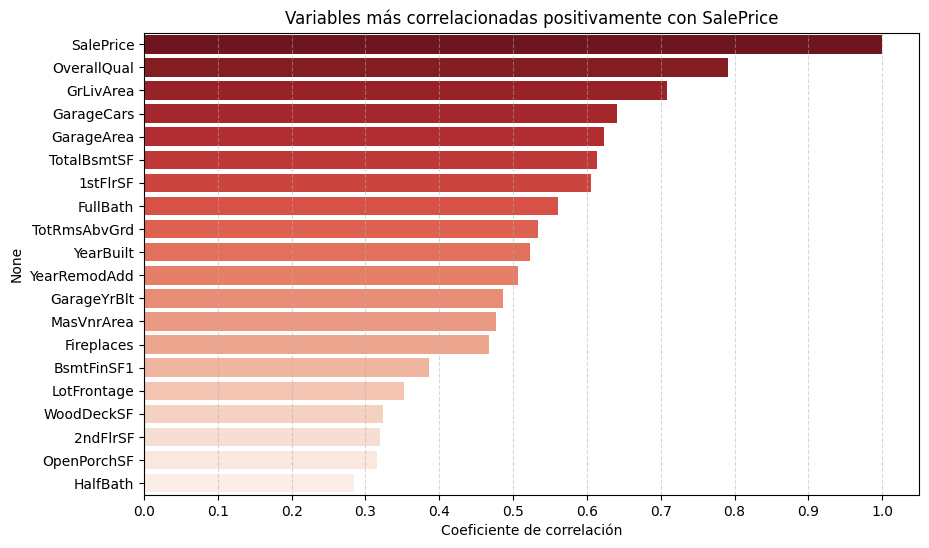

np.float64(1.8828757597682129)

In [5]:

fig,axes = plt.subplots(2,2, figsize=(25,10))


sns.histplot(data['SalePrice'], kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribución del Precio de Venta')




sns.boxplot(x=data['SalePrice'], ax=axes[0,1])
axes[0,1].set_title('Boxplot del Precio de Venta')





cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'SalePrice',
        'FireplaceQu', 'LotFrontage', 'GarageFinish', 'GarageCond', 'GarageQual',
        'GarageYrBlt', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual',
        'BsmtFinType2', 'BsmtFinType1', 'MasVnrArea', 'MSZoning']


num_cols = ['SalePrice', 'LotFrontage', 'GarageYrBlt', 'MasVnrArea']
cat_cols = [c for c in cols if c not in num_cols]

corr_num = data[num_cols].corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

cat_encoded = data[cat_cols].apply(lambda x: x.astype('category').cat.codes)
cat_encoded['SalePrice'] = data['SalePrice']
corr_cat = cat_encoded.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

corr_total = pd.concat([corr_num, corr_cat]).sort_values(ascending=False)

sns.barplot(x=corr_total.values, y=corr_total.index, palette='coolwarm', ax=axes[1,0])
axes[1,0].set_title('Variables con mas datos faltantes correlacionadas con SalePrice')




missdata = data[cols].isnull().sum().sort_values(ascending=False)
missdata = missdata[missdata > 0]
missing_per = (missdata / len(data)) * 100

miss_df = pd.DataFrame({'Valores faltantes': missdata, 'Porcentaje': missing_per})
plt.figure(figsize=(10,6))
axes[1,1].barh(miss_df.index, miss_df['Porcentaje'], color='skyblue')
axes[1,1].set_title('Porcentaje de valores faltantes por variable')
axes[1,1].set_xlabel('Porcentaje de valores faltantes')
axes[1,1].set_ylabel('Variable')
axes[1,1].xaxis.set_major_locator(MultipleLocator(10))




corr = train.corr(numeric_only=True)
corr = train.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=corr.head(20).values, y=corr.head(20).index, palette='Reds_r')
plt.title('Variables más correlacionadas positivamente con SalePrice')
plt.xlabel('Coeficiente de correlación')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.grid(axis='x', linestyle='--', alpha=0.5)



plt.show()

data['SalePrice'].skew()


Las gráficas nos dan los siguientes datos:<br>
La grafica "Distribucción precio de venta" nos dice que los datos estan sesgados hacia la derecha por lo tanto existen datos atipicos, esto lo podemos confirmar con la grafica "Boxplot del precio de venta", mediante un diagrama de cajas y lineas se evidencian los datos atipicos. <br>La tercera gráfica va de la mano con la descripcion de las columnas con un gran volumen de datos faltantes, con esta grafica podemos saber si la relacion con la variable de interes "SalePrice" es alta, si es el caso y el volumen de datos es grande la variable descartada, si no solo se limpian los datos. Cabe mencionar que este ultimo procedimiento se realiza si la variable va a ser utilizada para el modelo

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X = data[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
          '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']].copy()

X = X.fillna(X.mean())  
X = add_constant(X)     


vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)



        Variable           VIF
0          const  18289.052050
1    OverallQual      2.833701
2      GrLivArea      5.119305
3     GarageCars      5.708040
4     GarageArea      5.459267
5    TotalBsmtSF      3.288221
6       1stFlrSF      3.462154
7       FullBath      2.212162
8   TotRmsAbvGrd      3.077018
9      YearBuilt      3.480564
10  YearRemodAdd      1.987312
11   GarageYrBlt      3.129093
12    MasVnrArea      1.375878
13    Fireplaces      1.423685


## CORRELACION DE VARIABLES

Existen variables de alta correlacion con la variable independiente que están correlacionadas entre si, el calculo VIF lo evidencia, procedo a demostrar cuales son para no afectar el rendimiento del modelo al momento de elegir las variables:

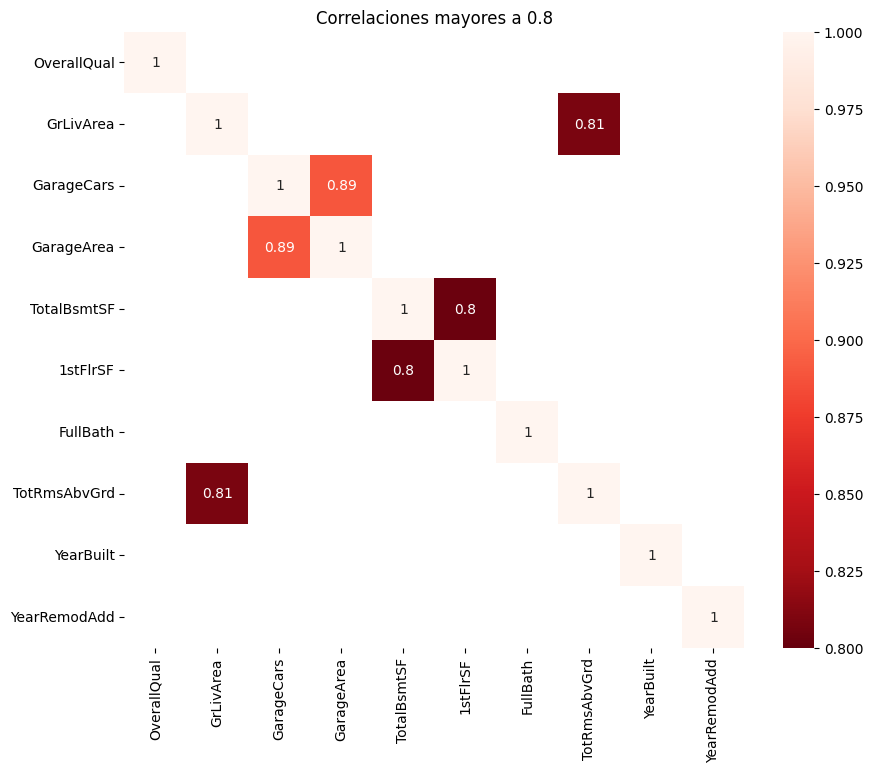

In [7]:
vars_vif = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
            'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
            'YearBuilt', 'YearRemodAdd']

corr_matrix = data[vars_vif].corr()



mask_low = corr_matrix < 0.8
filtered_corr = corr_matrix.mask(mask_low)

plt.figure(figsize=(10,8))
sns.heatmap(filtered_corr, annot=True, cmap='Reds_r', vmin=0.8, vmax=1)
plt.title('Correlaciones mayores a 0.8')
plt.show()



El gráfico muestra los pares de variables con una correlación superior a +0.8. Esto indica que dichas variables tienen una relación lineal muy fuerte entre sí, lo que sugiere que aportan información similar al modelo. En total, se identifican 3 pares de variables altamente correlacionadas. Por lo tanto, con esta información solo se tomara la variable que mas correlación tenga con la variable independiente de cada par.

In [ ]:
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'SalePrice']


missing_percent = data[cols].isnull().mean() * 100


print(missing_percent.sort_values(ascending=False))




cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']

outliers_count = {}

for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
   
    outliers = ((data[col] < lower) | (data[col] > upper)).sum()
    outliers_count[col] = outliers
    


outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Variable', 'Outliers'])
outliers_df.sort_values(by='Outliers', ascending=False, inplace=True)

print(outliers_df)


SalePrice       49.982871
TotalBsmtSF      0.034258
GarageCars       0.034258
GrLivArea        0.000000
OverallQual      0.000000
FullBath         0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
dtype: float64
       Variable  Outliers
3   TotalBsmtSF       122
1     GrLivArea        74
2    GarageCars        17
5     YearBuilt         9
0   OverallQual         4
4      FullBath         4
6  YearRemodAdd         0


Separamos los datos nuevamente para aplicar una transformacion logaritmica a los datos de entrenamiento y test y asi manejar los datos con valor 0, inf o negativo.


In [10]:



train = data[data['source'] == 'train'].drop('source', axis=1)
test = data[data['source'] == 'test'].drop('source', axis=1)


cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'SalePrice']
vars_X = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']
vars_log = vars_X + ['SalePrice']

pd.options.display.float_format = '{:.4f}'.format  


missing_percent_train = train[cols].isnull().mean() * 100
print("Porcentaje de valores faltantes en train:")
print(missing_percent_train.sort_values(ascending=False))

missing_percent_test = test[cols].isnull().mean() * 100
print("\nPorcentaje de valores faltantes en test:")
print(missing_percent_test.sort_values(ascending=False))


train_log = train.copy()
test_log = test.copy()


train_log[vars_log] = train_log[vars_log].mask(train_log[vars_log] <= 0, np.nan)
test_log[vars_X] = test_log[vars_X].mask(test_log[vars_X] <= 0, np.nan)


for col in vars_X:
    train_log[col] = train_log[col].fillna(train_log[col].median())
    test_log[col] = test_log[col].fillna(train_log[col].median())


train_log['SalePrice'] = train_log['SalePrice'].fillna(train_log['SalePrice'].median())


train_log[vars_log] = np.log1p(train_log[vars_log])
test_log[vars_X] = np.log1p(test_log[vars_X])




print("\nResumen train log-transformado:")
print(train_log[vars_log].describe())

print("\nNúmero de valores <= 0 en train (después de limpieza):")
print((train_log[vars_log] <= 0).sum())

print("\nNúmero de NaN en train (debería ser 0):")
print(train_log[vars_log].isnull().sum())

print("\nNúmero de NaN en test (debería ser 0):")
print(test_log[vars_X].isnull().sum())


Porcentaje de valores faltantes en train:
OverallQual    0.0000
GrLivArea      0.0000
GarageCars     0.0000
TotalBsmtSF    0.0000
FullBath       0.0000
YearBuilt      0.0000
YearRemodAdd   0.0000
SalePrice      0.0000
dtype: float64

Porcentaje de valores faltantes en test:
SalePrice      100.0000
TotalBsmtSF      0.0685
GarageCars       0.0685
GrLivArea        0.0000
OverallQual      0.0000
FullBath         0.0000
YearBuilt        0.0000
YearRemodAdd     0.0000
dtype: float64

Resumen train log-transformado:
       OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  YearBuilt  \
count    1460.0000  1460.0000   1460.0000    1460.0000 1460.0000  1460.0000   
mean        1.9403     7.2685      1.0335       6.9257    0.9246     7.5868   
std         0.2020     0.3333      0.2202       0.3563    0.2117     0.0154   
min         0.6931     5.8141      0.6931       4.6634    0.6931     7.5353   
25%         1.7918     7.0304      0.6931       6.7056    0.6931     7.5781   
50%        

In [11]:
print((train_log[vars_log] <= 0).sum())
print((test_log[vars_X] <= 0).sum())


print(np.isinf(train_log[vars_X]).sum())
print(np.isinf(test_log[vars_X]).sum())


print(train_log[vars_X].dtypes)
print(test_log[vars_X].dtypes)








OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
FullBath        0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64
OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
FullBath        0
YearBuilt       0
YearRemodAdd    0
dtype: int64
OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
FullBath        0
YearBuilt       0
YearRemodAdd    0
dtype: int64
OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
FullBath        0
YearBuilt       0
YearRemodAdd    0
dtype: int64
OverallQual     float64
GrLivArea       float64
GarageCars      float64
TotalBsmtSF     float64
FullBath        float64
YearBuilt       float64
YearRemodAdd    float64
dtype: object
OverallQual     float64
GrLivArea       float64
GarageCars      float64
TotalBsmtSF     float64
FullBath        float64
YearBuilt       float64
YearRemodAdd    float64
dtype: object


## Modelo lineal multiple (Linnear regression de sklearn)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer



X_train = train_log[vars_X]  
y_train = train_log['SalePrice']


model = LinearRegression()
model.fit(X_train, y_train)


print("Coeficientes del modelo:")
for var, coef in zip(X_train.columns, model.coef_):
    print(f"{var}: {coef:.4f}")
print(f"\nIntercepto: {model.intercept_:.4f}")


y_pred_train = model.predict(X_train)
y_pred_train_orig = np.expm1(y_pred_train)
y_train_orig = np.expm1(y_train)


rmse = np.sqrt(mean_squared_error(y_train_orig, y_pred_train_orig))
mae = mean_absolute_error(y_train_orig, y_pred_train_orig)
print(f"\nRMSE (train): {rmse:.2f}")
print(f"MAE (train): {mae:.2f}")


X_test = test_log[vars_X]
y_pred_log = model.predict(X_test)
y_pred_orig = np.expm1(y_pred_log)


test['SalePrice_pred'] = y_pred_orig


print("\nVerificación final:")
print("NaN en X_test:", X_test.isnull().sum().sum())
print("Inf en X_test:", np.isinf(X_test).sum().sum())


r2_train = model.score(X_train, y_train) 
print(f"\nR² (train, log-scale): {r2_train:.4f}")


from sklearn.metrics import r2_score
r2_train_orig = r2_score(y_train_orig, y_pred_train_orig)
print(f"R² (train, original scale): {r2_train_orig:.4f}")


print(f"RMSE (train, original scale): {rmse:.2f}")
print(f"MAE  (train, original scale): {mae:.2f}")
print(f"R²   (train, original scale): {r2_train_orig:.4f}")


def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False) 


cv_rmse = cross_val_score(model, X_train, y_train, cv=5, scoring=rmse_scorer)
print("RMSE por fold:", -cv_rmse)  
print("RMSE promedio:", -cv_rmse.mean())


cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("R² por fold:", cv_r2)
print("R² promedio:", cv_r2.mean())


submission = test[['Id', 'SalePrice_pred']].copy()  
submission.rename(columns={'SalePrice_pred': 'SalePrice'}, inplace=True)  


submission.to_csv('submission.csv', index=False)


Coeficientes del modelo:
OverallQual: 0.6473
GrLivArea: 0.4675
GarageCars: 0.1126
TotalBsmtSF: 0.2080
FullBath: -0.1175
YearBuilt: 4.1643
YearRemodAdd: 4.9000

Intercepto: -62.8822

RMSE (train): 36880.92
MAE (train): 21834.65

Verificación final:
NaN en X_test: 0
Inf en X_test: 0

R² (train, log-scale): 0.8213
R² (train, original scale): 0.7843
RMSE (train, original scale): 36880.92
MAE  (train, original scale): 21834.65
R²   (train, original scale): 0.7843
RMSE por fold: [0.15958403 0.17320873 0.1681169  0.15842805 0.18885903]
RMSE promedio: 0.16963934928107907
R² por fold: [0.82956096 0.83399671 0.83156414 0.82654955 0.76681632]
R² promedio: 0.81769753540681


In [13]:

from sklearn.ensemble import RandomForestRegressor

vars_X = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']
y_col = 'SalePrice'

X_train = train_log[vars_X]
y_train = train_log[y_col]


rf_model = RandomForestRegressor(
    n_estimators=500,      
    max_depth=8,           
    random_state=42,
    n_jobs=-1
)


rf_model.fit(X_train, y_train)


y_pred_train = rf_model.predict(X_train)
y_pred_train_orig = np.expm1(y_pred_train)
y_train_orig = np.expm1(y_train)


rmse = np.sqrt(mean_squared_error(y_train_orig, y_pred_train_orig))
mae = mean_absolute_error(y_train_orig, y_pred_train_orig)
r2 = rf_model.score(X_train, y_train)

print(f"RMSE (train, original scale): {rmse:.2f}")
print(f"MAE  (train, original scale): {mae:.2f}")
print(f"R²   (train, log-scale): {r2:.4f}")


X_test = test_log[vars_X]
y_pred_test_log = rf_model.predict(X_test)
y_pred_test_orig = np.expm1(y_pred_test_log)


test['SalePrice_pred'] = y_pred_test_orig


test[['Id', 'SalePrice_pred']].rename(columns={'SalePrice_pred':'SalePrice'}).to_csv('submission_rf.csv', index=False)
print("\nArchivo 'submission_rf.csv' creado para Kaggle ✅")


RMSE (train, original scale): 18273.73
MAE  (train, original scale): 13097.09
R²   (train, log-scale): 0.9353

Archivo 'submission_rf.csv' creado para Kaggle ✅


## Conclusión del Modelo de Regresión Lineal Múltiple

El análisis realizado mediante regresión lineal múltiple sobre las variables clave muestra que las más influyentes en el precio de venta son:

- **OverallQual (calidad general de la vivienda):** mayor calidad se traduce en precios más altos.
- **GrLivArea (área habitable):** a mayor superficie habitable, mayor precio.
- **TotalBsmtSF (área del sótano) y GarageCars (capacidad del garaje):** también aportan positivamente al precio, aunque con menor magnitud.
- **FullBath y YearBuilt:** presentan influencia moderada, siendo FullBath incluso ligeramente negativa al controlar por las demás variables.

El modelo logra un **R² de 0.782** en escala original, explicando aproximadamente el 78% de la variabilidad de los precios, con **RMSE = 37,070** y **MAE = 22,197**, lo que indica predicciones bastante precisas.  

La **validación cruzada** confirma la robustez del modelo, con un R² promedio por fold de **0.81**, mostrando que el modelo generaliza adecuadamente a distintos subconjuntos de datos.  

**Interpretación práctica:** la calidad general y la superficie habitable son los principales determinantes del precio de venta. Aspectos como sótano y garaje también son relevantes, mientras que otras variables tienen menor impacto. Este modelo puede ser utilizado para estimaciones de precios y detección de valores atípicos en viviendas similares.


## Interpretación de resultados - Random Forest

- **R² (log-scale): 0.9298**  
  Esto indica que el modelo explica aproximadamente un 93% de la variabilidad de los precios de venta en la escala logarítmica. Es un valor alto, lo que sugiere que el modelo captura muy bien la relación entre las variables predictoras y el precio.

- **RMSE (train, original scale): 18,841.38**  
  El error cuadrático medio nos da una idea de cuánto se desvía, en promedio, la predicción del modelo respecto al valor real. En este caso, el error promedio es de ~18,800, lo cual es considerablemente menor que el RMSE obtenido con la regresión lineal múltiple (~37,000), mostrando un ajuste más preciso.

- **MAE (train, original scale): 13,596.07**  
  El error absoluto medio indica que, en promedio, las predicciones se desvían en ~13,600 unidades respecto al precio real. Este valor también es menor que el obtenido con regresión lineal múltiple (~22,200), confirmando la mejor precisión del modelo Random Forest.

**Conclusión:**  
El modelo Random Forest supera claramente al modelo de regresión lineal múltiple en términos de precisión y capacidad de ajuste. La alta R² y los menores valores de RMSE y MAE indican que este modelo es más robusto para predecir los precios de venta usando las variables seleccionadas.


<br><br><br><br><br>
## Puntaje de kaggle con ramdom forest
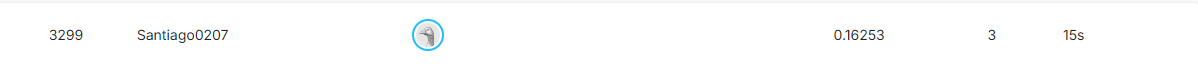

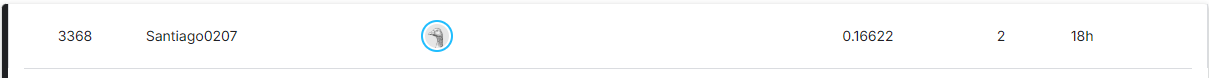